In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('medals.csv', index_col=0, low_memory=False)

In [2]:
data.shape

(33261, 11)

In [3]:
# Drop duplicates
print('Number of duplicates:', len(data) - len(data.drop_duplicates()))
data = data.drop_duplicates()
data.shape

Number of duplicates: 1552


(31709, 11)

In [13]:
data.info()
data['Sport'].equals(data['Discipline'])

<class 'pandas.core.frame.DataFrame'>
Index: 31709 entries, Athens (1896) to Rio (2016)
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        31708 non-null  float64
 1   Sport       31708 non-null  object 
 2   Discipline  31708 non-null  object 
 3   Athlete     31708 non-null  object 
 4   Team        31708 non-null  object 
 5   Gender      31708 non-null  object 
 6   Event       31708 non-null  object 
 7   Medal       31708 non-null  object 
 8   Gold        31708 non-null  float64
 9   Silver      31708 non-null  float64
 10  Bronze      31708 non-null  float64
dtypes: float64(4), object(7)
memory usage: 2.9+ MB


False

In [5]:
data.describe()

,Year,Gold,Silver,Bronze
count,31708.000000,31708.000000,31708.000000,31708.000000
mean,1975.022329,0.335404,0.330138,0.334742
std,32.916449,0.475136,0.470270,0.471908
min,1896.000000,0.000000,0.000000,0.000000
25%,1956.000000,0.000000,0.000000,0.000000
50%,1984.000000,0.000000,0.000000,0.000000
75%,2000.000000,1.000000,1.000000,1.000000
max,2016.000000,10.000000,1.000000,1.000000


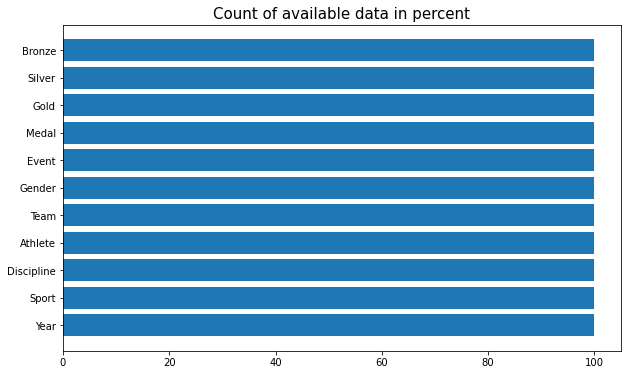

In [6]:
# Capture necessary data
variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)

#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [7]:
data.head()

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0.0,1.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0.0,0.0,1.0
Athens (1896),1896.0,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0.0,1.0,0.0


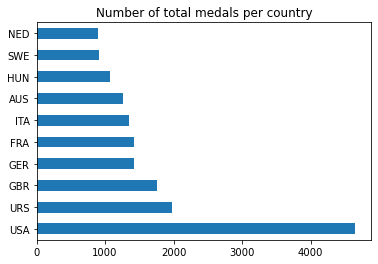

In [9]:
# Number of medals
(data['Team'].value_counts()[:10]).plot(kind='barh', 
                                        title = 'Number of total medals per country')

In [51]:
data.groupby(['Athlete'])[['Gold']].count()

,Gold
Athlete,
#NAME?,60
' Francesca Dallape,1
' Ivan Shtyl,1
'ALMEIDA Michael D,2
'CONNOR Cian O,1
...,...
Ödön Grof,1
Ödön Tersztyanszky,3
Ödön Tery,1


# Question 1
Approach:
- Filter gold medals from data on the discipline/sport 'Athletics'
- Count number of gold medals

In [14]:
# Filter useful data for Q1
data_athletes = data[(data.Athlete != '#NAME?')
                     & (data.Discipline == 'Athletics') 
                     & (data.Gold == 1.0)]
data_athletes.head()

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Athletics,Athletics,Thomas Burke,USA,Men,100m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Thomas Curtis,USA,Men,110m hurdles men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Edwin Flack,AUS,Men,1500m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Thomas Burke,USA,Men,400m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Edwin Flack,AUS,Men,800m men,Gold,1.0,0.0,0.0


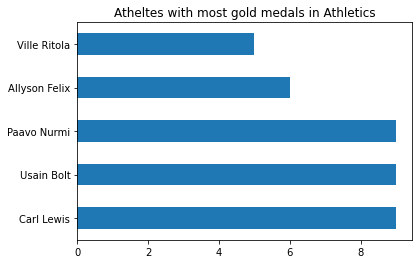

In [17]:
# Get top n most frequent athletes with gold medals
n = 5
(data_athletes['Athlete'].value_counts()[:n]).plot(kind='barh', 
                                                   title = 'Atheltes with most gold medals in Athletics')
# data_athletes['Athlete'].value_counts()[:n]


In [18]:
# Wikipedia says usain did not win beijing 2008 4x100?
data_athletes.loc[data_athletes['Athlete'] == 'Usain Bolt']

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,100m men,Gold,1.0,0.0,0.0
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,200m men,Gold,1.0,0.0,0.0
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,4x100m relay men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,100m men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,200m men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,4x100m relay men,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,4x100m relay,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,200m,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,100m,Gold,1.0,0.0,0.0


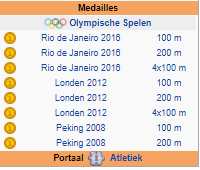

Jamaica disqualified because of doping usage, is not in the data.

# Question 2
Assumption: 
- Event duplicates only differ with words 'women' and 'men' (e.g. the table above has '100m men' and '100m' as entries, which in the end is the same discipline)

Approach:
- Make function to get unique events per athlete by making a new column which contains Athlete + Event
- Drop duplicate events where the athlete and event are the same
- Count unique gold medals

In [19]:
# Function to calculate unique event wins 
def count_different_event(df, n):
    
    # Remove words men and women, 100m men and women will be distinguished by the name of the athlete 
    df['Event'] = df['Event'].str.replace(' women','')
    df['Event'] = df['Event'].str.replace(' men','')
    
    # Make new column
    df['Athlete + Event'] = df['Athlete'] + ' ' + df['Event']
    
    # Get unique persons and unique events
    df = df.drop_duplicates(subset='Athlete + Event', keep="first")
    
    # Get dataframe with athletes and 
    output = df['Athlete'].value_counts()[:n].rename_axis('Athlete').reset_index(name='Gold on number of unique events')
    
    return output

In [20]:
# Dataframe with athletes who won a gold medal
data_events = data[(data.Athlete != '#NAME?')
                   & (data.Discipline == 'Athletics')
                   & (data.Gold == 1.0)]

In [21]:
output_q2 = count_different_event(data_events, 10)

<ipython-input-19-9350d36a6183>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' women','')
<ipython-input-19-9350d36a6183>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' men','')
<ipython-input-19-9350d36a6183>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [22]:
# The third place differs per simulation, because there are multiple athlets with 4 gold medals on different events
output_q2

,Athlete,Gold on number of unique events
0,Paavo Nurmi,6
1,Ville Ritola,5
2,Fanny Blankers-koen,4
3,Alvin Kraenzlein,4
4,Hannes Kolehmainen,4
5,Jesse Owens,4
6,Carl Lewis,4
7,Betty Cuthbert,4
8,James Lightbody,3
9,Florence Griffith-joyner,3


In [23]:
# print(output_q2['Athlete'][0])

# Question 3
Assumption: 
- Every event happens once every olympic games
- Team members in the same team as the person guilty of doping also disqualify. Individual events of those team members are still legit

Approach: 
- Use dataframe od Q2 to find first and third athlete with most gold medals on unique events
- Locate illegit medals and make them invalid (by assigning a 0.0), also of teammembers, if applicable
- Redistribute medals among other athletes
- Remove rows with disqualified athletes
- Count gold medals at unique events again by using the function from Q2

In [37]:
data_q3 = data

In [38]:
# Get first athlete with most gold medals from Q2
doping_medals1 = data_q3.loc[(data_q3['Athlete'] == output_q2['Athlete'][0])]
# doping_medals1

In [39]:
# Get third athlete with most gold medals from Q2
doping_medals2 = data_q3.loc[(data_q3['Athlete'] == output_q2['Athlete'][2])]
# doping_medals2

In [40]:
doping_medals = pd.concat([doping_medals1, doping_medals2], axis=0)
doping_medals

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,10000m men,None,0.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,None,0.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country individual men,None,0.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country team men,None,0.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,1500m men,None,0.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,3000m team men,None,0.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,None,0.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country individual men,None,0.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country team men,None,0.0,0.0,0.0


In [41]:
# Loop over guilty earned medals
for i in range(len(doping_medals)):
    
    # Year, event make the event unique
    temp_year = doping_medals.Year[i]
    temp_event = doping_medals.Event[i]
    temp_medal = doping_medals.Medal[i]
    
    # Get the team to also disqualify teammembers
    temp_team = doping_medals.Team[i]
    
    # For changes in data if the illegit medal is gold
    if (temp_medal == 'Gold'):
        
        # Punish teammembers of the team of the person guilty of doping
        data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event) &
                    (data_q3['Gold'] == 1.0) & (data_q3['Team'] == temp_team), 
                    ['Medal', 'Gold']] = ['None', 0.0]
        
        # Silver person(s) now has gold
        data_q3.loc[(data_q3['Year'] == temp_year)
                    & (data_q3['Event'] == temp_event) 
                    & (data_q3['Silver'] == 1.0),
                    ['Medal', 'Gold', 'Silver']] = ['Gold', 1.0, 0.0]
        
        # Bronze person(s) now has silver
        data_q3.loc[(data_q3['Year'] == temp_year)
                    & (data_q3['Event'] == temp_event) 
                    & (data_q3['Bronze'] == 1.0),
                    ['Medal', 'Silver', 'Bronze']] = ['Silver', 1.0, 0.0]
        
    # If guilty person had silver, the person who won gold still won gold,
    # The person who won bronze, now wins silver
    elif (temp_medal == 'Silver'):
        
        # Punish teammembers of doping person
        data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event) &
                    (data_q3['Silver'] == 1.0) & (data_q3['Team'] == temp_team), 
                    ['Medal', 'Silver']] = ['None', 0.0]
        
        data_q3.loc[(data_q3['Year'] == temp_year) 
                    & (data_q3['Event'] == temp_event)
                    & (data_q3['Bronze'] == 1.0), 
                    ['Medal', 'Silver', 'Bronze']] = ['Silver', 1.0, 0.0]

    else:
        
        # Punish teammembers of doping person when medal was bronze
        # We dont know the person who finished fourth, so we just remove the name of the guilty person later on.
        data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event) &
                    (data_q3['Bronze'] == 1.0) & (data_q3['Team'] == temp_team), 
                    ['Medal', 'Bronze']] = ['None', 0.0]
        
#     print(data_q3.loc[(data_q3['Year'] == temp_year) 
#                       & (data_q3['Event'] == temp_event)])
    
        

In [42]:
# Check whether it worked for individual medals
data_q3.loc[(data_q3['Event'] == '10000m men') & (data_q3['Year'] == 1920.0)]

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Antwerp (1920),1920.0,Athletics,Athletics,James Wilson,GBR,Men,10000m men,Silver,0.0,1.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,10000m men,None,0.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Joseph Guillemot,FRA,Men,10000m men,Gold,1.0,0.0,0.0


In [43]:
# Check whether it worked for team medals
data_q3.loc[(data_q3['Event'] == 'cross country team men') & (data_q3['Year'] == 1920.0)]

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Antwerp (1920),1920.0,Athletics,Athletics,Erik Backman,SWE,Men,cross country team men,Silver,0.0,1.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Hilding Ekman,SWE,Men,cross country team men,Silver,0.0,1.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Gustaf Mattsson,SWE,Men,cross country team men,Silver,0.0,1.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Frederik Teudor Koskenniemi,FIN,Men,cross country team men,None,0.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Heikki Liimatainen,FIN,Men,cross country team men,None,0.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country team men,None,0.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Frank Hegarty,GBR,Men,cross country team men,Gold,1.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Alfred Hubert Nichols,GBR,Men,cross country team men,Gold,1.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,James Wilson,GBR,Men,cross country team men,Gold,1.0,0.0,0.0


In [44]:
# Remove rows with name of first and third athlete from question 2
new_data = data_q3[(data_q3.Athlete != output_q2['Athlete'][0])
                   & (data_q3.Athlete != output_q2['Athlete'][2])]

In [45]:
new_data

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0.0,1.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0.0,0.0,1.0
Athens (1896),1896.0,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Rio (2016),2016.0,Weightlifting,Weightlifting,Alexandr Zaichikov,KAZ,Unknown,+ 105kg,Bronze,0.0,0.0,1.0
Rio (2016),2016.0,Sailing,Sailing,Thomas Zajac,AUT,Unknown,0.5-1t,Bronze,0.0,0.0,1.0
Rio (2016),2016.0,Wrestling,Wrestling Freestyle,Fengliu Zhang,CHN,Unknown,67.5 - 75kg (middleweight),Bronze,0.0,0.0,1.0


In [46]:
# Write filtered data
new_data.to_csv('medals_doping.csv')

In [47]:
# Dataframe with athletes obtaining a gold medal
data_athletes_new = new_data[(new_data.Athlete != '#NAME?')
                             & (new_data.Discipline == 'Athletics')
                             & (new_data.Gold == 1.0)]

In [48]:
count_different_event(data_athletes_new, 10)

<ipython-input-19-9350d36a6183>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' women','')
<ipython-input-19-9350d36a6183>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' men','')
<ipython-input-19-9350d36a6183>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Athlete,Gold on number of unique events
0,Hannes Kolehmainen,4
1,Jesse Owens,4
2,Carl Lewis,4
3,Betty Cuthbert,4
4,Ville Ritola,4
5,Alvin Kraenzlein,4
6,Usain Bolt,3
7,Melvin Sheppard,3
8,Archie Hahn,3
9,Robert Joseph Morrow,3


In [49]:
data_athletes_new['Athlete'].value_counts()[:5]

Usain Bolt         9
Carl Lewis         9
Allyson Felix      6
Ville Ritola       6
Melvin Sheppard    4
Name: Athlete, dtype: int64